In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
G = nx.Graph()
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
sentences = []
with open(r"./AllsWellThatEndsWell.txt", 'r') as f:
    for line in f.read().split('\n'):
        if line.upper() != line:
            sentences.append(line)
shks_index = len(sentences)
print("Shakespear Index: {} to {}".format(0, shks_index))
with open(r"./lyric_data.txt", 'r', encoding='utf-8') as f:
    for line in f.read().split('\n'):
        if len(line)==0:
            continue
        if line[0] != '[':
            sentences.append(line)
print("Migos Index: {} to {}".format(shks_index, len(sentences)))

Shakespear Index: 0 to 3329
Migos Index: 3329 to 24993


In [4]:
def name_edge(e1, e2):
    if e1 > e2:
        return '_'.join([e2, e1])
    else:
        return '_'.join([e1, e2])

In [5]:
data = []
for sentence in sentences:
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    words = sentence.lower().split()
    words = list(filter(lambda word: word not in stopwords.words('english'), words))
    SEN = nx.Graph()
    for i in range(len(words)-1):
        SEN.add_edge(words[i], words[i+1])
        try:
            SEN[words[i]][words[i+1]]['weight'] = SEN[words[i]][words[i+1]]['weight'] + 1
        except KeyError:
            SEN[words[i]][words[i+1]]['weight'] = 1
    sen_dic = {}
    for edge in SEN.edges.data('weight', default=1):
        sen_dic[name_edge(edge[0], edge[1])] = edge[2]
    data.append(sen_dic)

In [6]:
data[:10]

[{'rousillon_scene': 1, 'counts_rousillon': 1, 'counts_palace': 1},
 {'bertram_enter': 1,
  'bertram_countess': 1,
  'countess_rousillon': 1,
  'helena_rousillon': 1,
  'helena_lafeu': 1,
  'black_lafeu': 1},
 {'delivering_son': 1, 'bury_son': 1, 'bury_second': 1, 'husband_second': 1},
 {'going_madam': 1,
  'madam_weep': 1,
  'oer_weep': 1,
  'fathers_oer': 1,
  'death_fathers': 1},
 {'anew_must': 1,
  'attend_must': 1,
  'attend_majestys': 1,
  'command_majestys': 1},
 {'evermore_ward': 1, 'evermore_subjection': 1},
 {'find_shall': 1, 'find_king': 1, 'husband_king': 1, 'husband_madam': 1},
 {'father_sir': 1, 'father_generally': 1, 'generally_times': 1},
 {'good_must': 1,
  'must_necessity': 1,
  'hold_necessity': 1,
  'hold_virtue': 1,
  'virtue_whose': 1},
 {'worthiness_would': 1,
  'stir_would': 1,
  'stir_wanted': 1,
  'rather_wanted': 1}]

In [7]:
df = pd.DataFrame(data).fillna(0)

KeyError: 'Corpus'

In [14]:
df['Corpus'] = "Migos"
df.loc[:shks_index, 'Corpus'] = "Shakespeare"

In [15]:
df.head()

,000_100,000_200,000_40,000_50,000_aint,000_chain,000_chop,000_craps,000_dollar,000_face,...,young_youproblemshook,young_ysl,youre_‘cause,ysl_ysl,yuh_yuh,zax_zaxbys,zay_zay,zaymigo_zayt,–_“plain,Corpus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shakespeare
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shakespeare
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shakespeare
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shakespeare
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shakespeare


In [35]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=3)
pca.fit(df.drop(['Corpus'], axis=1))
Z = pca.transform(df.drop(['Corpus'], axis=1))

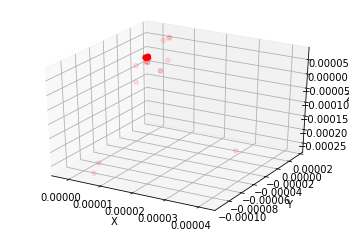

In [51]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

m = 'o'
xs = Z[:shks_index, 0]
ys = Z[:shks_index, 1]
zs = Z[:shks_index, 2]
ax.scatter(xs, ys, zs, marker=m, color='r', alpha=0.1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

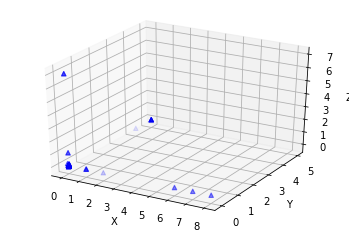

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

m = '^'
xs = Z[shks_index:, 0]
ys = Z[shks_index:, 1]
zs = Z[shks_index:, 2]
ax.scatter(xs, ys, zs, marker=m, color='b', alpha=0.1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()